### 🤖 LangGraph Chatbot with Memory Checkpointing

- This chatbot is built using LangGraph where conversation flow is modeled as a graph (START → chat_node → END).

- It integrates Groq LLM for generating responses and uses MemorySaver checkpoints to preserve chat history across turns.

- The chatbot runs in a loop, allowing continuous interaction until the user exits.

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the key
groq_api_key = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    groq_api_key=groq_api_key,
    model="gemma2-9b-it"   
)

resp = llm.invoke("Hello, how are you?")
print(resp.content)

As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today?



In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq

# concept of persistance --> memory checkpoint
from langgraph.checkpoint.memory import MemorySaver

In [4]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [5]:
def chat_node(state:ChatState):
    messages = state['messages'] 
    resp = llm.invoke(messages)
    return {'messages': [resp]}

    

In [6]:
checkpoint = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

# compile the graph
chatbot =graph.compile(checkpointer=checkpoint)

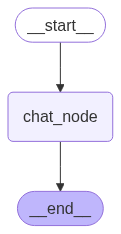

In [7]:
chatbot

In [8]:
# example run

initial_state ={
    'messages': [HumanMessage(content="Hello, how are you? and who is the prime minister of india?")]
}

chatbot.invoke(initial_state)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [9]:

thread_id = '1'

while True:
    user_message =input("Type here: ")
    print('User:',user_message)

    if user_message.strip().lower() in ['exit','quit','close','bye']:
        print("Exiting the chat. Goodbye!")
        break
    
    config ={'configurable': {'thread_id': thread_id}}
    response =chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config )

    print('Bot:',response['messages'][-1].content)



User: whats Langgraph and langsmith
Bot: Let's break down Langgraph and Langsmith:

**Langgraph**

* **What it is:** Langgraph is an open-source platform designed to streamline the development and deployment of large language models (LLMs). 
* **Key Features:**
    * **Model Management:**  Langgraph helps you easily organize, track, and manage your LLMs.
    * **Training and Fine-Tuning:** It provides tools and infrastructure to efficiently train and fine-tune LLMs on your data.
    * **Deployment:** Langgraph simplifies the process of deploying your trained models for use in applications.
    * **Community-Driven:**  It's built and maintained by a community of researchers and developers, fostering collaboration and innovation.

* **Think of it as:** A comprehensive toolbox specifically for working with LLMs, from creation to deployment.

**Langsmith**

* **What it is:** Langsmith is an open-source framework focused on making it easier to develop and experiment with LLMs. 
* **Key Feat

In [10]:
chatbot.get_state(config={'configurable': {'thread_id': thread_id}})

StateSnapshot(values={'messages': [HumanMessage(content='whats Langgraph and langsmith', additional_kwargs={}, response_metadata={}, id='11ea3ab7-7ca9-47c4-83da-9932a23bc385'), AIMessage(content="Let's break down Langgraph and Langsmith:\n\n**Langgraph**\n\n* **What it is:** Langgraph is an open-source platform designed to streamline the development and deployment of large language models (LLMs). \n* **Key Features:**\n    * **Model Management:**  Langgraph helps you easily organize, track, and manage your LLMs.\n    * **Training and Fine-Tuning:** It provides tools and infrastructure to efficiently train and fine-tune LLMs on your data.\n    * **Deployment:** Langgraph simplifies the process of deploying your trained models for use in applications.\n    * **Community-Driven:**  It's built and maintained by a community of researchers and developers, fostering collaboration and innovation.\n\n* **Think of it as:** A comprehensive toolbox specifically for working with LLMs, from creation